Name : Tan Sook Mun

ID   : 30695759

Email: stan0111@student.monash.edu

# TASK 2 : DATA VISUALISATION

## **Streaming Data Visualization**


<IPython.core.display.Javascript object>


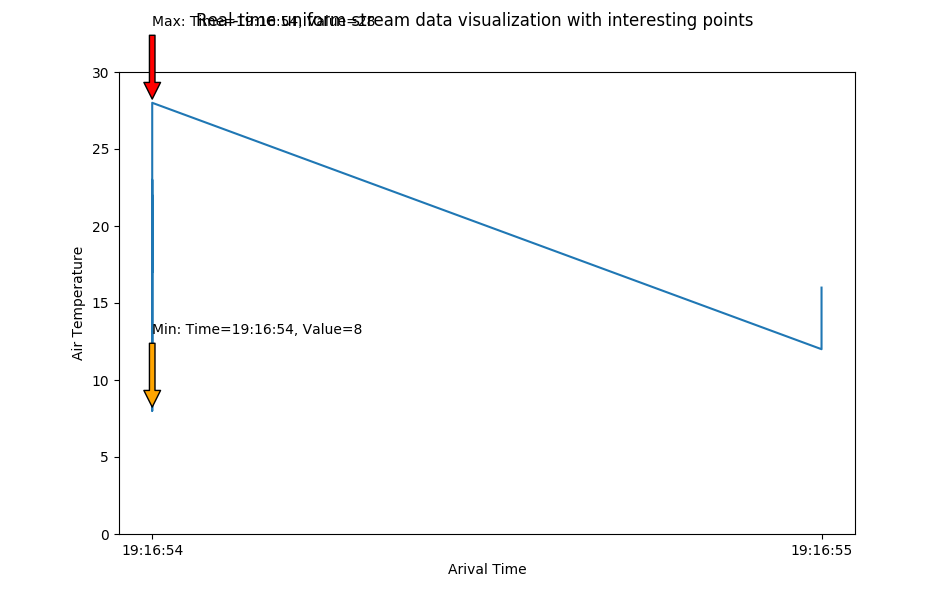

KeyboardInterrupt: 

In [1]:
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import json

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'partB'

def annotate_max(x, y, ax = None):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    text = 'Max: Time={}, Value={}'.format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    ymin = min(y)
    xpos = y.index(ymin)
    xmin = x[xpos]
    text = 'Min: Time={}, Value={}'.format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_ylim(0,110) 
        ax.set_yticks([0,20,40,60,80,100])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        count=0
        for message in consumer:
            key=message[5].decode("utf-8") #this is to get the key from message
            if key =="producer1": #only process the climate data
                data = message[6].decode("utf-8") #decode because it was encoded in bytes
                data = json.loads(data) #loading into dict
                x.append(dt.datetime.now().strftime("%X")) 
                y.append(data.get("air_temperature_celcius"))
                count+=1
                # print(y)
                # we start plotting only when we have 10 data points
                if len(y) > 10:
                    ax.clear()
                    ax.plot(x, y)
                    ax.set_xlabel('Arival Time')
                    ax.set_ylabel('Air Temperature')
                    ax.set_ylim(0,30) 
                    ax.set_yticks([0,5,10,15,20,25,30]) #the range for air temp 
                    annotate_max(x,y)
                    annotate_min(x,y)
                    fig.canvas.draw()
                    x.pop(0) # removing the item in the first position
                    y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)

## **Static Data Visualization**


**Task 2.2 a**

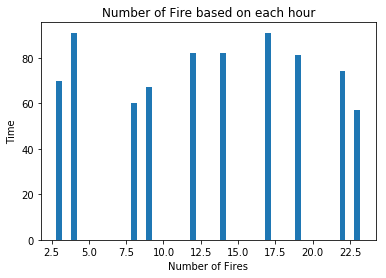

In [2]:
"""
Plot a bar chart to visualize the total number of fire records based on each
hour
use aggregate function
"""
import matplotlib.pyplot as plt
from pprint import pprint
#add function here
import pymongo
from pymongo import MongoClient
# Method 1: connect on the default host and port
client = MongoClient()
db = client.fit3182_assignment_db
partB = db.partB
pipeline = [
    {"$unwind":"$fire_events"}, #unwind each fire_events
    {"$group": #group base on the hour
     {"_id":"$fire_events.hour", 
      "count":{"$sum":1}}}
]

day=[] # the data for x axis
hotspots=[] # the data for y axis
results = partB.aggregate(pipeline) #appy aggregation to get the data
for document in results:
    #pprint(document)
    #append the data based on x,y axis
    hotspots.append(document["count"])
    day.append(document["_id"])
plt.bar(day, hotspots,  0.4)
plt.xlabel("Number of Fires")
plt.ylabel("Time")
plt.title("Number of Fire based on each hour")
plt.show()

**Task 2.2 b**

In [1]:
#my VM had problem with using pandas and using pip install. To use folium i will need to hv pandas. The code has not be run
#I coded to the best of my knowleged

import folium
from pymongo import MongoClient

def map_plot(fires, locations):
    m = folium.Map(location=[-38.043995, 145.264296], zoom_start=8) # starting on melbourne city
        
    # plot marker in the map
    count=0
    for fire in fires:

        # Get the information of records in here...
        area=locations[count]
        latitude = float(area[0])
        longitude = float(area[1])
        humidity=area[2]
        surface_temp=document.get("avg_surface_temp")
        confidence=document.get("confidence")
        air_temparea[3]
        
        # Get the fire cause
        event = document['event']
        
        # Add marker to the map object
        if event == 'natural':
            folium.Marker([latitude, longitude], popup = "Status: " + str(status) + "\n" + "Second line",
                          icon=folium.Icon(color='blue', icon='map-pin', prefix='fas fa-map-pin')
                         ).add_to(m)
        else:
            folium.Marker([latitude, longitude], popup = "Status: " + str(status) + "\n" + "Second line",
                          icon=folium.Icon(color='red', icon='map-pin', prefix='fas fa-map-pin')
                         ).add_to(m)

        
    return m


if __name__ == "__main__":
    
    # Step 1. Access to the database and read the record using find()

    client = MongoClient()
    db = client.fit3182_assignment_db
    results = db.partB
    # Preparing the data for plotting
    fires = []
    locations=[] #contains and array of locations and other important variable
    # Looping through all the data
    for row in results.find():
        fire_event=row['fire_events']
        for fire in fire_event: #loop through each fire event
            fires.append(fire)
            locations.append([float(row['latitude']), float(row['longitude']),
                              row["relative_humidity"],row["air_temperature_celcius"]])
    
    # Step 2. To get map object with markers
    plot_map = map_plot(fires,locations)
    
    # Step 3. To plot map object
    display(plot_map)

TypeError: descriptor '__subclasses__' of 'type' object needs an argument